We here show how we predict M+N measurements for a variety of scenarios using a simple test molecule, C2NO2. This is a companion demo to the notebook showing how to use these measurements to compute constrains on the isotome of this molecule. We define the basic information for this molecule in a .csv file. The same .csv file is also the input for the companion demo, so it includes the measured values that we are about to compute. 

We begin by running the code that allows us to calculate all Isotopologues. 

In [1]:
run parseInput.py

In [2]:
run calcIsotopologues.py

Here, we define basic information about the experiment. This is included in the top block of the .csv file. It includes our sites, the number of atoms present ("Stoich"), and how fragments sample the sites. It also includes site-specific delta values that will be used to simulate the measurements. 

In [3]:
inputFile = parseInput('C2NO2ExampleClump.csv')
df = pd.DataFrame.from_dict(inputFile['basicInfo'])
fragmentList = inputFile['M1Dict']['Fragment List']
df['Stoich'] = [int(x) for x in list(df['Stoich'])]
df.rename(columns={'atom ID':'site',"element": "IDS", "Stoich": "Number",'Ref Deltas':'deltas'},inplace = True)

In [4]:
df

,site,IDS,Number,Equivalence,70,54,42,deltas
0,C-1,C,1,0.0,1.0,1.0,0.0,25.0
1,C-2,C,1,0.0,1.0,1.0,1.0,-25.0
2,N-3,N,1,0.0,1.0,1.0,1.0,0.0
3,O-4,O,1,0.0,1.0,1.0,1.0,13.0
4,O-5,O,1,0.0,1.0,0.0,0.0,-13.0


In [5]:
siteElements = strSiteElements(df)

In [6]:
siteIsotopes, multinomialCoeff = calculateSetsOfSiteIsotopes(df)
bigA, SN = calcAllIsotopologues(siteIsotopes, multinomialCoeff)

In [7]:
concentrationArray = siteSpecificConcentrations(df)

In [8]:
d = calculateIsotopologueConcentrations(bigA, SN, concentrationArray)

We develop two ways of indexing into and using the set of all isotopologues. In the first case, we index by type of substitution--I.e. bySub['13C'] gives all isotopologues with a single H substiution. In the second case, we explicitly write the vector representation for an isotopologue; i.e. byCondensed['10000'] for that isotopologue. 

In [9]:
bySub = {}
for i, v in d.items():
    condensed = condenseStr(i)
    Subs = ''.join([uEl(element, int(number)) for element, number in zip(siteElements, condensed)])
    if Subs not in bySub:
        bySub[Subs] = {'Number': 0, 'Full': [],'Conc': 0, 'Mass': [], 'Condensed': []}
    bySub[Subs]['Number'] += v['num']
    bySub[Subs]['Full'].append(i)
    bySub[Subs]['Conc'] += v['Conc']
    bySub[Subs]['Mass'].append(np.array(list(map(int,condensed))).sum())
    bySub[Subs]['Condensed'].append(condensed)
    

In [10]:
byCondensed = {}
siteElements = strSiteElements(df)
for i, v in d.items():
    condensed = condenseStr(i)
    byCondensed[condensed] = {}
    byCondensed[condensed]['Number'] = v['num']
    byCondensed[condensed]['full'] = i
    byCondensed[condensed]['Conc'] = v['Conc']
    byCondensed[condensed]['Mass'] = np.array(list(map(int,condensed))).sum()
    byCondensed[condensed]['Subs'] = ''.join([uEl(element, int(number)) for element, number in zip(siteElements, condensed)])
    
    

In [11]:
bySub

{'': {'Number': 1,
  'Full': ['00000'],
  'Conc': 0.9696862013627834,
  'Mass': [0],
  'Condensed': ['00000']},
 '17O': {'Number': 2,
  'Full': ['00001', '00010'],
  'Conc': 0.0007367675757954429,
  'Mass': [1, 1],
  'Condensed': ['00001', '00010']},
 '18O': {'Number': 2,
  'Full': ['00002', '00020'],
  'Conc': 0.0038888295419453067,
  'Mass': [2, 2],
  'Condensed': ['00002', '00020']},
 '17O17O': {'Number': 1,
  'Full': ['00011'],
  'Conc': 1.3992534964117162e-07,
  'Mass': [2],
  'Condensed': ['00011']},
 '17O18O': {'Number': 1,
  'Full': ['00012'],
  'Conc': 7.295789014038658e-07,
  'Mass': [3],
  'Condensed': ['00012']},
 '18O17O': {'Number': 1,
  'Full': ['00021'],
  'Conc': 7.473072975196862e-07,
  'Mass': [3],
  'Condensed': ['00021']},
 '18O18O': {'Number': 1,
  'Full': ['00022'],
  'Conc': 3.896503660942643e-06,
  'Mass': [4],
  'Condensed': ['00022']},
 '15N': {'Number': 1,
  'Full': ['00100'],
  'Conc': 0.003564566476209593,
  'Mass': [1],
  'Condensed': ['00100']},
 '15N17O

In [12]:
byCondensed

{'00000': {'Number': 1,
  'full': '00000',
  'Conc': 0.9696862013627834,
  'Mass': 0,
  'Subs': ''},
 '00001': {'Number': 1,
  'full': '00001',
  'Conc': 0.0003635947986550511,
  'Mass': 1,
  'Subs': '17O'},
 '00002': {'Number': 1,
  'full': '00002',
  'Conc': 0.001895804401698337,
  'Mass': 2,
  'Subs': '18O'},
 '00010': {'Number': 1,
  'full': '00010',
  'Conc': 0.0003731727771403918,
  'Mass': 1,
  'Subs': '17O'},
 '00011': {'Number': 1,
  'full': '00011',
  'Conc': 1.3992534964117162e-07,
  'Mass': 2,
  'Subs': '17O17O'},
 '00012': {'Number': 1,
  'full': '00012',
  'Conc': 7.295789014038658e-07,
  'Mass': 3,
  'Subs': '17O18O'},
 '00020': {'Number': 1,
  'full': '00020',
  'Conc': 0.0019930251402469697,
  'Mass': 2,
  'Subs': '18O'},
 '00021': {'Number': 1,
  'full': '00021',
  'Conc': 7.473072975196862e-07,
  'Mass': 3,
  'Subs': '18O17O'},
 '00022': {'Number': 1,
  'full': '00022',
  'Conc': 3.896503660942643e-06,
  'Mass': 4,
  'Subs': '18O18O'},
 '00100': {'Number': 1,
  'full

Check that both dictionaries sum to 1

In [13]:
###Should be = 1, minus floating point error
s = 0
for i, v in byCondensed.items():
    s += v['Conc']
print(s)

s = 0
for i, v in bySub.items():
    s += v['Conc']
print(s)

1.0000000000000002
1.0


Then we simulate the measurements we are interested in 

In [14]:
allMeasurementInfo = {'Full' : {}}
siteElements = strSiteElements(df)

### Simulate  measurement with mass selection but no fragmentation
abundDict = {}    
totalConc = 0

for sub, info in bySub.items():
    
    if info['Mass'][0] <= 3:
        abundDict[sub] = {'Abs. Abundance':info['Conc']}

for i, v in abundDict.items():
    allMeasurementInfo['Full'][i] = v

In [35]:
###Prepare to simulate M+N experiments, first by mass selecting
M0 = {}
M1 = {}
M2 = {}
M3 = {}
M4 = {}

for i, v in byCondensed.items():
    if v['Mass'] == 0:
        M0[i] = v
    if v['Mass'] == 1:
        M1[i] = v
    if v['Mass'] == 2:
        M2[i] = v
    if v['Mass'] == 3:
        M3[i] = v
    if v['Mass'] == 4:
        M4[i] = v
        
massSelectedFragment = [M1,M2]
massSelectedFragmentKeys = ['M1','M2']

#Then defining fragments
#parseInput currently returns floats, not 'x'. Need to fix. 
def zeroToX(y):
    if y == 0:
        return 'x'
    else:
        return int(y)
    
f54 = df['54'].values
f42 = df['42'].values


frag_54 = [zeroToX(z) for z in f54]
frag_42 = [zeroToX(z) for z in f42]

fragments = [frag_54, frag_42]
fragKeys = ['54','42']

In [42]:
#Then fragmenting

#For each population (M1, M2, M3) that we mass select and fragment...
for i, massSelection in enumerate(massSelectedFragment):
    #add a key to output dictionary
    if massSelectedFragmentKeys[i] not in allMeasurementInfo:
        allMeasurementInfo[massSelectedFragmentKeys[i]] = {}
    
    #For each fragment we will observe
    for j, fragment in enumerate(fragments):
        #compute the isotopologues present after fragmentation and track their concentrations
        fragmentedDict = {}
        for isotopologue, value in massSelection.items():
            frag = [fragMult(x,y) for x, y in zip(fragment, isotopologue)]
            newIsotopologue = ''.join(frag)
            if newIsotopologue not in fragmentedDict:
                fragmentedDict[newIsotopologue] = 0
            fragmentedDict[newIsotopologue] += value['Conc']
        
        #Combine isotopologues with the same substitutions
        selectedIsotopologues = fragmentedDict
        predictSpectrum = {}

        for key, item in selectedIsotopologues.items():
            subs = computeSubs(key, siteElements)

            if subs not in predictSpectrum:
                predictSpectrum[subs] = {'Abs. Abundance':0}

            predictSpectrum[subs]['Abs. Abundance'] += item

        #compute relative abundances
        totalAbundance = 0
        for key, item in predictSpectrum.items():
            totalAbundance += item['Abs. Abundance']

        for key, item in predictSpectrum.items():
            item['Rel. Abundance'] = item['Abs. Abundance'] / totalAbundance

        #cut off entries with relative abundance below some threshold
        shortSpectrum = {}
        for x, v in predictSpectrum.items():
            if v['Rel. Abundance'] > 0.0:
                shortSpectrum[x] = v
        
        allMeasurementInfo[massSelectedFragmentKeys[i]][fragKeys[j]] = shortSpectrum

In [43]:
allMeasurementInfo

{'Full': {'': {'Abs. Abundance': 0.9696862013627834},
  '17O': {'Abs. Abundance': 0.0007367675757954429},
  '18O': {'Abs. Abundance': 0.0038888295419453067},
  '17O17O': {'Abs. Abundance': 1.3992534964117162e-07},
  '17O18O': {'Abs. Abundance': 7.295789014038658e-07},
  '18O17O': {'Abs. Abundance': 7.473072975196862e-07},
  '15N': {'Abs. Abundance': 0.003564566476209593},
  '15N17O': {'Abs. Abundance': 2.7083576086240487e-06},
  '15N18O': {'Abs. Abundance': 1.429533739619095e-05},
  '15N17O17O': {'Abs. Abundance': 5.14365585280947e-10},
  '13C': {'Abs. Abundance': 0.02179311556390774},
  '13C17O': {'Abs. Abundance': 1.6558409205457103e-05},
  '13C18O': {'Abs. Abundance': 8.739911065749559e-05},
  '13C17O17O': {'Abs. Abundance': 3.1447382779755472e-09},
  '13C15N': {'Abs. Abundance': 8.011149281292486e-05},
  '13C15N17O': {'Abs. Abundance': 6.086871223926031e-08},
  '13C13C': {'Abs. Abundance': 0.0001223702698579299},
  '13C13C17O': {'Abs. Abundance': 9.297693103805514e-08},
  '13C13C15

In [48]:
###pick out just the quantities of interest
outputDict = {}
fullMoleculeU = ['13C','15N','17O','18O','13C13C']

for key in fullMoleculeU:
    v = UValueBySubFromSub(bySub, key)
    outputDict[key + " U Value"] = v
    
#Calculate adjusted relative abundances for M+N experiments and add to output. This may be relevant as many 
#low abundance peaks will be cut off, especially for high N. 
for key, value in allMeasurementInfo.items():
    if key in massSelectedFragmentKeys:
        for fragment, data in value.items():
            totalAdjAbund = 0
            for sub, abundance in data.items():
                outputDict[key + " " + fragment + ' ' + sub] = {'Abs. Abundance':abundance['Abs. Abundance'],
                                                    'Rel. Abundance':abundance['Rel. Abundance'],
                                                    'Adj. Rel. Abundance':0}
                totalAdjAbund += abundance['Abs. Abundance']
                
            for sub, abundance in data.items():
                outputDict[key + " " + fragment + ' ' + sub]['Adj. Rel. Abundance'] = abundance['Abs. Abundance'] / totalAdjAbund
    


In [49]:
out = pd.DataFrame.from_dict(outputDict).T

In [52]:
M2

{'00002': {'Number': 1,
  'full': '00002',
  'Conc': 0.001895804401698337,
  'Mass': 2,
  'Subs': '18O'},
 '00011': {'Number': 1,
  'full': '00011',
  'Conc': 1.3992534964117162e-07,
  'Mass': 2,
  'Subs': '17O17O'},
 '00020': {'Number': 1,
  'full': '00020',
  'Conc': 0.0019930251402469697,
  'Mass': 2,
  'Subs': '18O'},
 '00101': {'Number': 1,
  'full': '00101',
  'Conc': 1.3365744798559682e-06,
  'Mass': 2,
  'Subs': '15N17O'},
 '00110': {'Number': 1,
  'full': '00110',
  'Conc': 1.3717831287680805e-06,
  'Mass': 2,
  'Subs': '15N17O'},
 '01001': {'Number': 1,
  'full': '01001',
  'Conc': 3.983642784660376e-06,
  'Mass': 2,
  'Subs': '13C17O'},
 '01010': {'Number': 1,
  'full': '01010',
  'Conc': 4.08858170299996e-06,
  'Mass': 2,
  'Subs': '13C17O'},
 '01100': {'Number': 1,
  'full': '01100',
  'Conc': 3.905435274630086e-05,
  'Mass': 2,
  'Subs': '13C15N'},
 '10001': {'Number': 1,
  'full': '10001',
  'Conc': 4.187932158232704e-06,
  'Mass': 2,
  'Subs': '13C17O'},
 '10010': {'Num

Our simulation gives the following output

In [51]:
pd.set_option("precision", 15)
out

,Abs. Abundance,Rel. Abundance,Adj. Rel. Abundance
13C U Value,0.022474400000000,0.022474400000000,0.022474400000000
15N U Value,0.003676000000000,0.003676000000000,0.003676000000000
17O U Value,0.000759800000000,0.000759800000000,0.000759800000000
18O U Value,0.004010400000000,0.004010400000000,0.004010400000000
13C13C U Value,0.000126195742175,0.000126195742175,0.000126195742175
M1 54,0.000363594798655,0.013933798336690,0.013933798336690
M1 54 17O,0.000373172777140,0.014300848748802,0.014300848748802
M1 54 15N,0.003564566476210,0.136602477870845,0.136602477870845
M1 54 13C,0.021793115563908,0.835162875043664,0.835162875043664
M1 42,0.011532566525158,0.441954771796568,0.441954771796568


In [47]:
out.to_csv('M+N Example')

We can generate simulated spectra in the following way

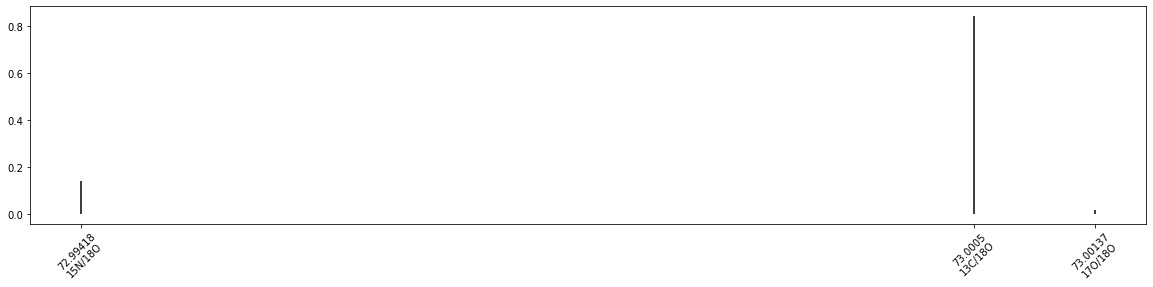

In [23]:
import matplotlib.pyplot as plt
#####PREDICT FULL SPECTRUM (NO FRAGMENT) #####
#####CUT OFF ISOTOPOLOGUES WITH LOW REL ABUNDANCE #####
selectedIsotopologues = M3
lowAbundanceCutOff = 0.01
massError = -0.000


predictSpectrum = {}
for key, item in selectedIsotopologues.items():
    mass = computeMass(key, siteElements)
    correctedMass = mass + massError
    subs = computeSubs(key, siteElements)
    
    if correctedMass not in predictSpectrum:
        predictSpectrum[correctedMass] = {'Abs. Abundance':0}
        
        if 'Sub' not in predictSpectrum[correctedMass]:
            predictSpectrum[correctedMass]['Sub'] = subs
            
    predictSpectrum[correctedMass]['Abs. Abundance'] += item['Conc']
    
totalAbundance = 0
for key, item in predictSpectrum.items():
    totalAbundance += item['Abs. Abundance']
    
massPlot = []
relAbundPlot = []
subPlot = []
for key, item in predictSpectrum.items():
    item['Rel. Abundance'] = item['Abs. Abundance'] / totalAbundance
    massPlot.append(key)
    relAbundPlot.append(item['Rel. Abundance'])
    subPlot.append(item['Sub'])
    
fig, ax = plt.subplots(figsize = (20,4))
massPlotcutOff = []
subPlotcutOff = []
for i in range(len(massPlot)):
    if relAbundPlot[i] > lowAbundanceCutOff:
        ax.vlines(massPlot[i], 0, relAbundPlot[i])
        massPlotcutOff.append(massPlot[i])
        subPlotcutOff.append(subPlot[i])
ax.set_xticks(massPlotcutOff)
labels = [str(round(x,5)) +'\n' + y for x,y in zip(massPlotcutOff,subPlotcutOff)]
ax.set_xticklabels(labels,rotation = 45);
    

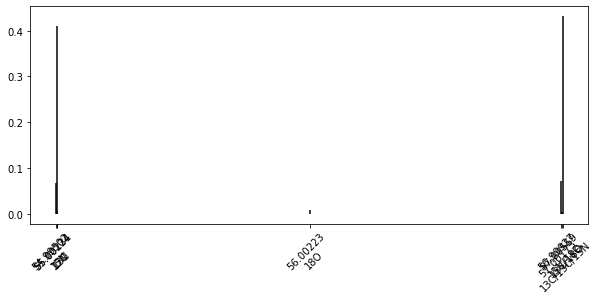

In [27]:
##### PREDICT SPECTRUM WITH FRAGMENTATION #####
selectedIsotopologues = M3
lowAbundanceCutOff = 0.001
massError = 0.000
fragment = expandFrag(frag_54, list(df['Number'].values))
bounds = None



##### Fragment Isotopologues #####
fragmentedDict = {}
for isotopologue, data in selectedIsotopologues.items():
    frag = [fragMult(x,y) for x, y in zip(fragment, isotopologue)]
    newIsotopologue = ''.join(frag)
    if newIsotopologue not in fragmentedDict:
        fragmentedDict[newIsotopologue] = 0
    fragmentedDict[newIsotopologue] += data['Conc']

selectedIsotopologues = fragmentedDict


##### Predict Spectrum #####
predictSpectrum = {}
for key, item in selectedIsotopologues.items():
    mass = computeMass(key, siteElements)
    correctedMass = mass + massError
    subs = computeSubs(key, siteElements)
    
    if correctedMass not in predictSpectrum:
        predictSpectrum[correctedMass] = {'Abs. Abundance':0}
        
        if 'Sub' not in predictSpectrum[correctedMass]:
            predictSpectrum[correctedMass]['Sub'] = subs
            
    predictSpectrum[correctedMass]['Abs. Abundance'] += item
    
totalAbundance = 0
for key, item in predictSpectrum.items():
    totalAbundance += item['Abs. Abundance']
    
massPlot = []
relAbundPlot = []
subPlot = []
for key, item in predictSpectrum.items():
    item['Rel. Abundance'] = item['Abs. Abundance'] / totalAbundance
    massPlot.append(key)
    relAbundPlot.append(item['Rel. Abundance'])
    subPlot.append(item['Sub'])
    
fig, ax = plt.subplots(figsize = (10,4))
massPlotcutOff = []
subPlotcutOff = []
for i in range(len(massPlot)):
    if relAbundPlot[i] > lowAbundanceCutOff:
        ax.vlines(massPlot[i], 0, relAbundPlot[i])
        massPlotcutOff.append(massPlot[i])
        subPlotcutOff.append(subPlot[i])
ax.set_xticks(massPlotcutOff)
labels = [str(round(x,5)) +'\n' + y for x,y in zip(massPlotcutOff,subPlotcutOff)]
ax.set_xticklabels(labels,rotation = 45);
if bounds != None:
    ax.set_xlim(bounds[0],bounds[1])
#ax.set_xlim(107.035, 107.07)
    